In [72]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [28]:
#Read the data set
dfHealth = pd.read_csv("/home/amol/GL/LabML/Residency2/projectassignment/Stat-Project-2/insurance.csv") 

In [30]:
dfHealth.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [31]:
dfHealth.shape      #Shape of the data 

(1338, 7)

In [32]:
dfHealth.dtypes       #Data type of each attribute 

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [33]:
#Checking the presence of missing values 
dfHealth.isnull().sum()    # do not see any null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
dfHealth.describe().transpose()       # 5 point summary

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. 

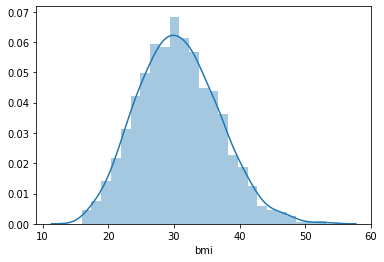

In [35]:
sns.distplot(dfHealth.bmi)

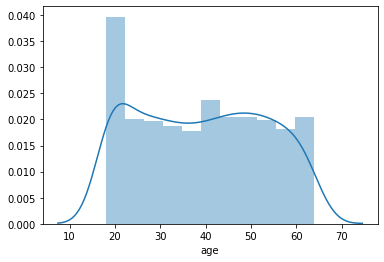

In [36]:
sns.distplot(dfHealth.age)

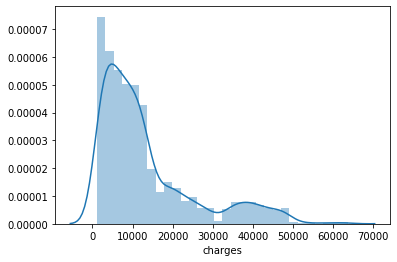

In [37]:
sns.distplot(dfHealth.charges)

Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [65]:
dfHealth.skew(axis = 0) 

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [67]:
dfHealth.kurtosis(axis=0)

age        -1.245088
bmi        -0.050732
children    0.202454
charges     1.606299
dtype: float64

#Analyses of Skewness

Field 'bmi' : 
Based on visual apperance we can it is normally distibuted. 
Based on 5 point summary min = 15.9, Median = 30.4, max=53...the difference between median and min is 14.5 and between max and median is 22.6...this again suggest distibution is right skewed
The skew value = 0.28 which is > 0 means it is right skewed but value is close to zero so very little skewness
The kurtosis value = -0.05 is amlost zero shows that it is less peaked than notmal bistribution but from practical point of view it is almost normal distribution

Field 'age' :
Based on 5 point summary min = 18, Median = 39, max=64...the difference between median and min is 21 and between max and median is 25...this again suggest distibution is slightly right skewed
Also skew value = 0.05 suggests that slightly right skewed
The kurtosis value = - 1.24   The negative value suggests that the distribution is very less peaked than notmal distribution...the plot also shows same thing.

Field 'charges' :
Based on 5 point summary min = 1121, Median = 9382, max=63770...the difference between median and min is 8261 and between max and median is 54388...this again suggest distibution is highly right skewed
The skew value of 1.5 shows that it is right skewed and considerable skewness exists in distribution
The kurtosis value 1.6 suggests that distribution is much more peaked than notmal distribution


Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

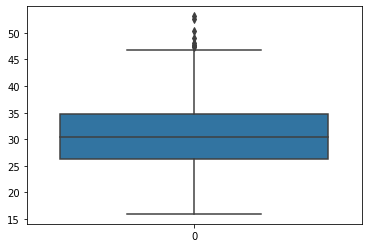

In [80]:
#sns.boxplot(x = "bmi", y = "sex", data = dfHealth)
sns.boxplot(data = dfHealth.bmi)
plt.show()
# Below plot shows outliers does exists

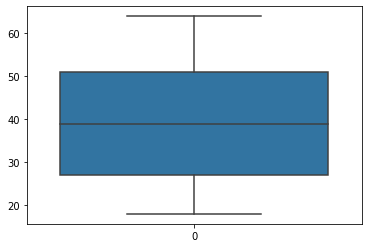

In [83]:
#sns.boxplot(x = "age", y = "sex", data = dfHealth)
sns.boxplot(data = dfHealth.age)
plt.show()
# There are no outliers as per below plot

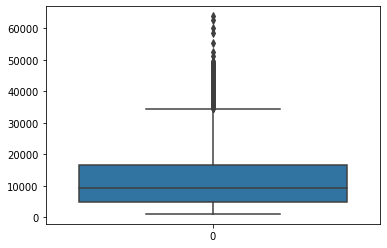

In [84]:
#sns.boxplot(x = "charges", y = "sex", data = dfHealth)
sns.boxplot(data = dfHealth.charges)
plt.show()
#Below plot shows huge number of outliers

(array([662.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 676.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

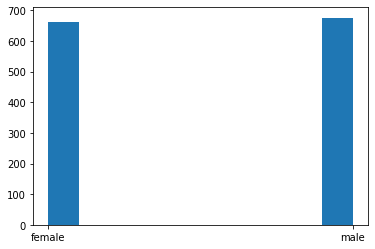

In [53]:
#Distribution of categorical columns (include children) 
plt.hist(x=dfHealth['sex'])

(array([574.,   0., 324.,   0., 240.,   0., 157.,   0.,  25.,  18.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

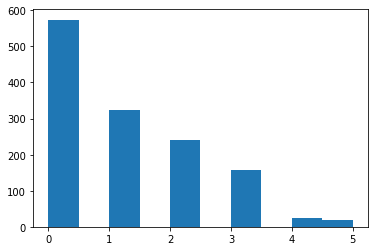

In [54]:
plt.hist(x=dfHealth['children'])

(array([ 274.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1064.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

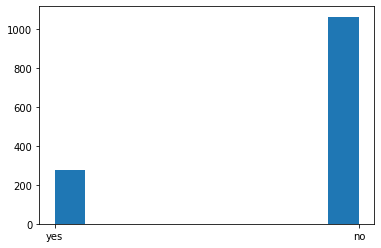

In [55]:
plt.hist(x=dfHealth['smoker'])

(array([325.,   0.,   0., 364.,   0.,   0., 325.,   0.,   0., 324.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

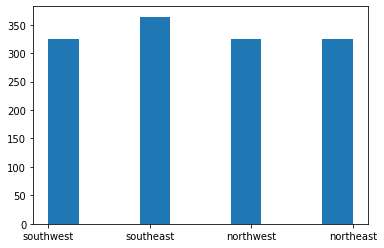

In [75]:
plt.hist(x=dfHealth['region'])

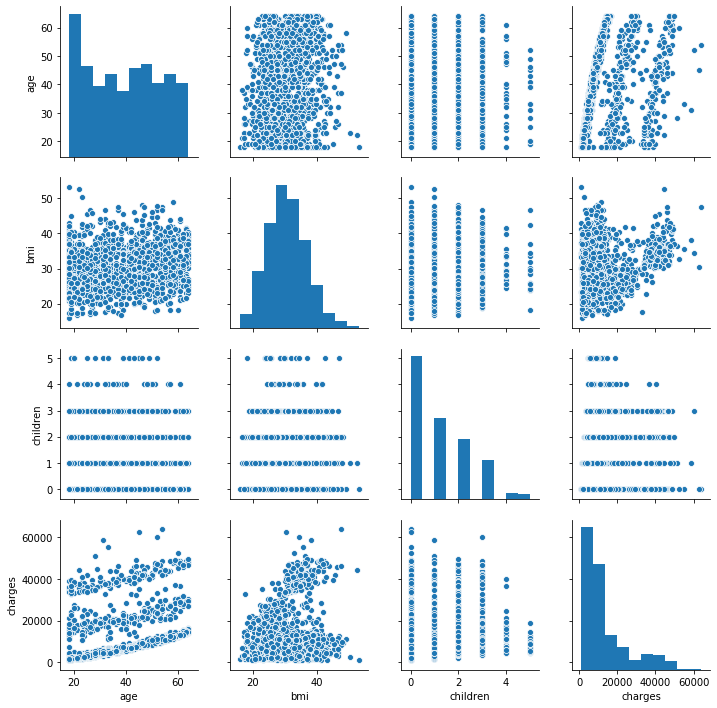

In [85]:
#Pair plot that includes all the columns of the data frame 
sns.pairplot(dfHealth)

4(a) : Do charges of people who smoke differ significantly from the people who don't? 

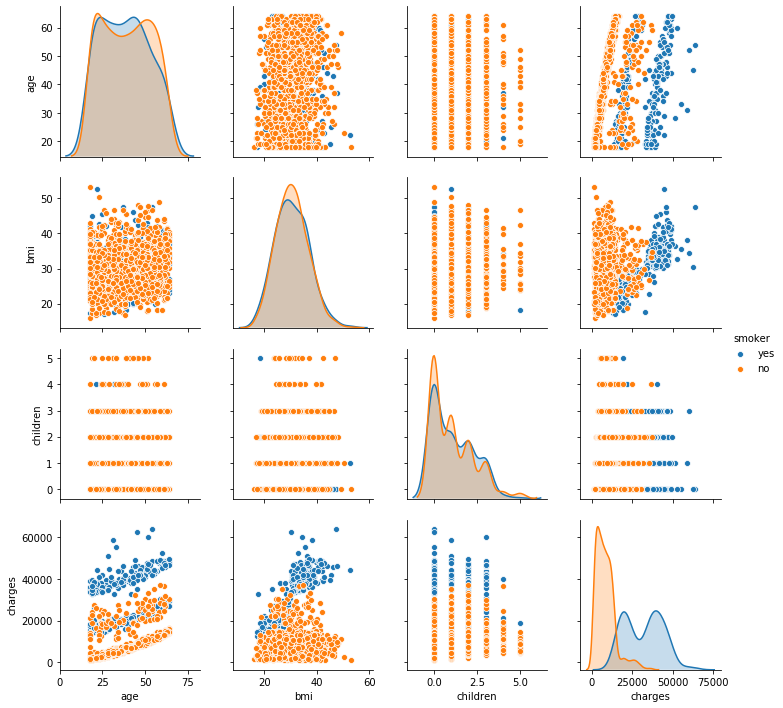

In [99]:
sns.pairplot(dfHealth,hue='smoker')

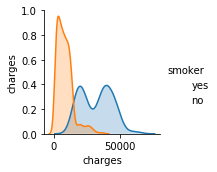

In [98]:
sns.pairplot(dfHealth, x_vars=["charges"],y_vars=["charges"],hue='smoker')

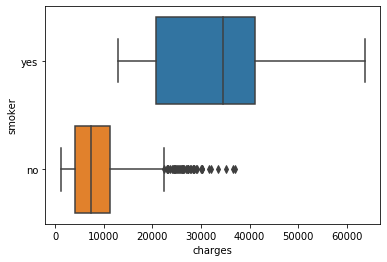

In [100]:
sns.boxplot(x = "charges", y = "smoker", data = dfHealth)

Above plot shows charges for people who smoke is significantly higher than who do not i.e. the central tendency of each distribution is quite significantly different.

#Lets check if stats support this.

Null Hypothese = H0 = There is no significant difference between distribution of charges of smoker and non smoker
Alternate Hypothesis = HA = There is significant difference between distribution of charges of smoker and non smoker

In [104]:
dfsmoker = dfHealth[dfHealth['smoker']=='yes']
dfnonsmoker = dfHealth[dfHealth['smoker']=='no']

In [107]:
dfsmoker.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [108]:
dfnonsmoker.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [109]:
from scipy import stats 
from scipy.stats import ttest_1samp , ttest_ind

In [110]:
t_statistic, p_value  =  stats.ttest_ind(dfsmoker['charges'],dfnonsmoker['charges'])

In [111]:
print (t_statistic,p_value)

46.664921172723716 8.271435842177219e-283


In [ ]:
# @ 5 % level of Significance
# p value (8.271435842177219e-283) < Level of Significance (0.05)
# So REJECT Null hypothises
# So the test shows that there is significant difference between distribution of charges for smoker and non smoker

4(b) : Does bmi of males differ significantly from that of females? 

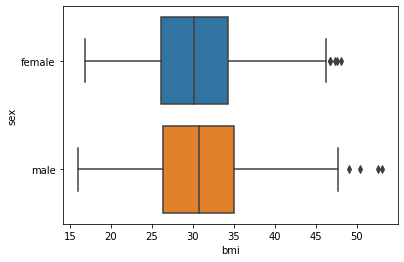

In [112]:
sns.boxplot(x="bmi", y = "sex" , data = dfHealth)

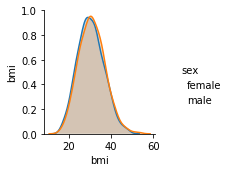

In [113]:
sns.pairplot(dfHealth, x_vars=["bmi"], y_vars=["bmi"], hue='sex')

Above plot does not show any significant difference between distribution of bmi for male and female.

#Lets check if stats support this.

Null Hypothese = H0 = There is no significant difference between distribution of bmi for male and female
Alternate Hypothesis = HA = There is significant difference between distribution of of bmi for male and female

In [115]:
dfMaleBMI = dfHealth[dfHealth['sex']=='male']
dfFemaleBMI = dfHealth[dfHealth['sex']=='female']

In [116]:
dfMaleBMI.describe()

,age,bmi,children,charges
count,676.000000,676.000000,676.000000,676.000000
mean,38.917160,30.943129,1.115385,13956.751178
std,14.050141,6.140435,1.218986,12971.025915
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4619.134000
50%,39.000000,30.687500,1.000000,9369.615750
75%,51.000000,34.992500,2.000000,18989.590250
max,64.000000,53.130000,5.000000,62592.873090


In [117]:
dfFemaleBMI.describe()

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


In [121]:
t_statistic, p_value  =  stats.ttest_ind(dfMaleBMI['bmi'],dfFemaleBMI['bmi'])

print (t_statistic,p_value)

1.696752635752224 0.08997637178984932


In [ ]:
# @ 5 % level of Significance
# p value (0.0899) >  Level of Significance (0.05)
# So there is no significant evidence to reject Null hypothises
# So the test shows that there is no significant difference between distribution of bmi for male and female

4(c) : Is the proportion of smokers significantly different in different genders? 

In [123]:
dfsmoker['sex'].value_counts()

male      159
female    115
Name: sex, dtype: int64

In [124]:
dfnonsmoker['sex'].value_counts()

female    547
male      517
Name: sex, dtype: int64

In [139]:
import numpy as np

d1 = [159,115]
d2 = [517,547]

con_tbl = np.array([d1, d2])

In [140]:
from scipy.stats import chi2_contingency

In [141]:
chi_sq_Stat, p_value, dof, exp_freq = stats.chi2_contingency(con_tbl)

print ("chi2 stat : {0}\n p-value : {1}\n Degree of Freedom : {2}".format(chi_sq_Stat,p_value,dof))

chi2 stat : 7.3929108145999605
 p-value : 0.006548143503580674
 Degree of Freedom : 1


In [155]:
from scipy.stats import chi2

prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(chi_sq_Stat) >= critical:
    print('Dependent (reject H0)')
else :
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [156]:
# interpret p-value
alpha = 1.0 - prob
if p_value <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


The rejection of null hypothesis means the smoking and gender are dependent and this implies that proportion of smokers is significantly different in different genders.

4(d) : Is the distribution of bmi across women with no children, one child and two children, the same ? 

In [158]:
dfnochild = dfHealth[dfHealth['children']==0]

In [159]:
dfonechild = dfHealth[dfHealth['children']==1]

In [160]:
dftwochild = dfHealth[dfHealth['children']==2]

In [169]:
df1 = pd.DataFrame()
df1 = df1.append(dfnochild)
df1 = df1.append(dfonechild)
df1 = df1.append(dftwochild)

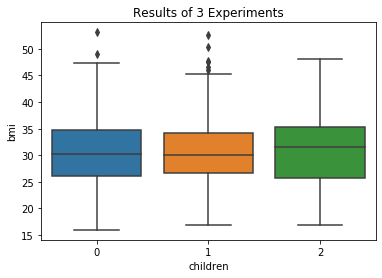

In [171]:
sns.boxplot(x = "children", y = "bmi", data = df1)
plt.title('Results of 3 Experiments')
plt.show()

In [175]:
from scipy.stats import levene


statistic, pval = levene(dfnochild['bmi'],dfonechild['bmi'],dftwochild['bmi'])

In [176]:
print (statistic,pval)

1.1137988954318256 0.3286679430229422


In [177]:
# p value (0.32) > Level of significance (0.05)...this implies that there is NO SIGNIFICANT evidence which suggest 
# that distribution of bmi across women with no children, one child and two children is different